In [285]:
import numpy as np
from matplotlib import pyplot as plt
RANDOM_STATE = 341


In [318]:
from typing import ClassVar
class neuron:

  def __init__(self, activation = False):
    self.activation_flag = activation
    # np.random.seed(RANDOM_STATE)
    self.W = np.random.rand(3,1)
    # self.W = np.zeros(shape=(3,1))

    if activation:
      self.activation = self.sigmoid
    else:
      self.activation = self.identity

  def sigmoid(self,v):
    return np.array(1/(1+np.exp(-v)))

  def identity(self,v):
    return v

  def calculate(self,x):
    """
    Asumo que tiene dos entradas 
    y = activation(Z)
    con Z = x_2*w_2 + x_1*w_1 + w_0*1
    """
    X = np.ones((3,1))
    X[1] = x[0]
    X[2] = x[1]
    self.Z = self.W.T@X
    self.dY_dW = self.dy_dw(x)
    self.dY_dX = self.dy_dx(x)
    self.Y = self.activation(self.Z)
    return np.array(self.Y, float)

  def dy_dw(self,x):
    dz_dwi = np.array([[1],[x[0]],[x[1]]])
    if self.activation_flag:
      df_dz = self.activation(self.Z)*(1-self.activation(self.Z))
      df_dwi = df_dz*df_dz
      return np.array(df_dwi , float)
    else:
      return np.array(dz_dwi , float)

  def dy_dx(self,x):
    if self.activation_flag:
      return np.array([-1,-1],float) # no se utiliza
    else:
      dz_dx = np.array([self.W[1],self.W[2]],float)
    return dz_dx

  def get_params(self):
    return self.W

  def set_params(self,W_new):
    self.W = W_new

class Loss:
  def __init__(self):
    pass

  def calculate(self,y_true,y_pred):
    """
    Asumo una única salida
    """
    self.err = (y_true - y_pred)*(y_true - y_pred)
    self.dL_dy_hat_calc(y_true,y_pred)
    
    return float(self.err)

  def dL_dy_hat_calc(self,y_true,y_pred):
    self.dL_dy_hat = float(-2*(y_true - y_pred))
    return


def foward(model,X):
    X0 = X
    model[0][0].calculate(X0)
    model[0][1].calculate(X0)
    Y0 = np.array([model[0][0].Y,model[0][1].Y],float)
    X1 = Y0
    model[1][0].calculate(X1)
    Y_hat = model[1][0].Y
    return float(Y_hat)


def backward(model,loss,lr):
    model[1][0].W -= lr*loss.dL_dy_hat*model[1][0].dY_dW
    model[0][0].W -= lr*loss.dL_dy_hat*model[1][0].dY_dX[0]*model[0][0].dY_dW
    model[0][1].W -= lr*loss.dL_dy_hat*model[1][0].dY_dX[1]*model[0][1].dY_dW
    return



In [328]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
# X = np.array([[0,0],[0,1]])
Y = np.array([0,1,1,0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


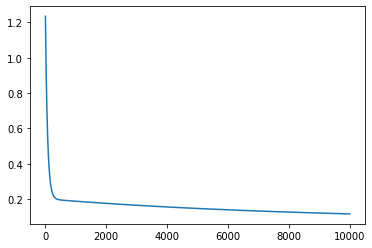

In [327]:
L_1 = []
L_2 = []

L_1.append(neuron(activation=True))
L_1.append(neuron(activation=True))
L_2.append(neuron(activation=False))

model = np.array([L_1,L_2],dtype = neuron)
loss = Loss()

EPOCH = 10000
lr = 0.001
MSE = []
for i in range(EPOCH):
  loss_value = []
  for k in range(len(X)):
    y_hat = foward(model,X[k])
    loss_value.append(loss.calculate(Y[k],y_hat))
    backward(model,loss,lr=lr)
  MSE.append(np.mean(loss_value))

plt.figure()
plt.plot(range(EPOCH),MSE)
plt.show()


In [329]:
for i in range(len(X)):
  print( X[i] , foward(model,X[i]))

[0 0] 0.35299841726184356
[0 1] 0.6738963366065153
[1 0] 0.2920099227258496
[1 1] 0.6169893875170958


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
